# 图像特效-Vignette效果

In [1]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/p3.jpg')
gray = cv2.imread('../datas/p3.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [3]:
# Returns the value by which we apply a vignette.
# Input: 2 Cartesian Points, Ex: (x1, y1), (x2, y2)
# Output: A value between 0 and 1 that corresponds
#   to the distance between the two points

def darkenPercent(x1, y1, x2, y2):
    
    # Distance Formula: Distance in pixels between 2 points
    distanceToCenterPixel = math.sqrt(math.pow((x2 - x1), 2) + math.pow((y2 - y1), 2));
    
    # Area un-effected by shading
    offset = 1;

    # Calculate float (Scale by the max distance - x1 in this case)
    result = (1 + offset - (distanceToCenterPixel / x1));

    # Ensure result is within scaling limits.
    if result < 0:
        return 0;
    elif result > 1:
        return 1;
    else:
        return result;

In [4]:
# Add a Vignette to an image (faded border)
# We do this by iterating through each pixel,
# and dampening its color values based on its
# proximity to the center pixel of the image.
# http://stackoverflow.com/questions/522563/accessing-the-index-in-python-for-loops

def vignette(image):
        
    # Store location of center pixel
    centerX = math.floor(len(image)    / 2);
    centerY = math.floor(len(image[0]) / 2);
    
    # Iterate rows
    for x, row in enumerate(image):
        
        # Iterate columns
        for y, pixel in enumerate(row):
            
            # Determine scale (rate of fade)
            scale = darkenPercent(centerX, centerY, x, y)            
            
            # Iterate colors
            for i in [0,1,2]:
                image[x][y][i] = image[x][y][i] * scale;
                
    return image;

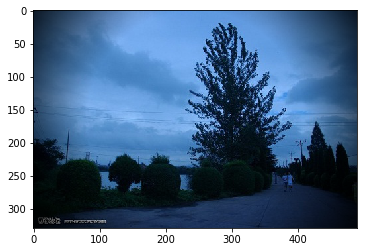

In [5]:
dst = vignette(rgb)
plt.imshow(dst)

Text(0.5,1,'SRC')

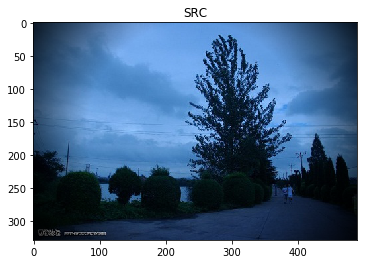

In [6]:
plt.imshow(rgb)
plt.title('SRC')